In [3]:
"""
Stochastic Calculus

Week 2. Ito's integral
"""

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import exp, log, sqrt, max, min, mean

def get_time(T=1, n=1000):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.

    Returns
    -------
    Vector of time points.
    """
    return np.linspace(start=0, stop=T, num=n+1)
    
def get_wiener_increments(T=1, n=1000, seed=None):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.
    seed : Initial seed for random number generation.
        The default is None.

    Returns
    -------
    Vector of Wiener process increments.
    """
    sd = sqrt(T/n)
    rng = np.random.default_rng(seed)
    delta_W = rng.normal(loc=0, scale=sd, size=n)
    return delta_W


def get_wiener_trajectory(T=1, n=1000, seed=None):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.
    seed : Initial seed for random number generation.
        The default is None.

    Returns
    -------
    Vector of (n+1) Wiener process values
    """
    delta_w = get_wiener_increments(T=T, seed=seed, n=n)
    w = np.zeros(n+1)
    w[1:(n+1)] = np.cumsum(delta_w)
    return w

In [4]:
# Draw the trajectory of I_t = int_0^t W_u^3 dW_u


def get_integral_trajectory(T=1, n=1000, seed=None):
  delta_w = get_wiener_increments(T=T, n=n, seed=seed)
  w = np.zeros(n + 1)
  w[1:(n + 1)] = np.cumsum(delta_w)
  t = get_time(T=T, n=n)
  integrand = w ** 3

  delta_integral = integrand[0:n] * delta_w

  integral = np.zeros(n + 1)
  integral[1:(n + 1)] = np.cumsum(delta_integral)

  return integral

In [7]:
T = 2
n = 1000
t = get_time(T, n)
integ = get_integral_trajectory(T, n)

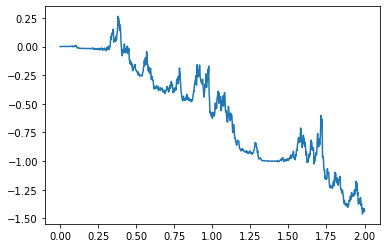

In [8]:
sns.lineplot(x=t, y=integ)

In [13]:
# Variance of I_3

n_sim = 10000
T = 3
n = 1000

final_value = np.zeros(n_sim)

for i in range(n_sim):
  integ_traj = get_integral_trajectory(T=T, n=n)
  final_value[i] = integ_traj[n]


In [11]:
final_value[0:10]

array([ -4.50945055,  -7.06778609,  -2.84570057,  -1.08175665,
        -1.45950683,  -5.07009525,   1.49383592,  -0.45964067,
       114.98343538,  -1.65919582])

In [14]:
np.var(final_value)

272.5200692985581